In [15]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import torch
# Set working directory to the base directory 'gpudrive'
working_dir = Path.cwd()
while working_dir.name != 'gpudrive':
    working_dir = working_dir.parent
    if working_dir == Path.home():
        raise FileNotFoundError("Base directory 'gpudrive' not found")
os.chdir(working_dir)

from gpudrive.env.config import EnvConfig, RenderConfig
from gpudrive.env.dataset import SceneDataLoader
from gpudrive.visualize.utils import bg_img_from_fig, img_from_fig

from gpudrive.env.env_torch import GPUDriveTorchEnv
# Increase the resolution of the figure
#plt.rcParams['figure.dpi'] = 100  # Higher DPI for better resolution

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
DYNAMICS_MODEL = "delta_local" # "delta_local" / "state" / "classic"
NUM_ENVS = 2
MAX_NUM_OBJECTS = 64
DEVICE = "cpu"


from gpudrive.env.dataset import SceneDataLoader

env_config = EnvConfig(
    steer_actions = torch.round(
        torch.linspace(-1.0, 1.0, 3), decimals=3),
    accel_actions = torch.round(
        torch.linspace(-3, 3, 3), decimals=3
    )
)

In [18]:
# Create data loader
train_loader = SceneDataLoader(
    root="data/processed/examples",
    batch_size=NUM_ENVS,
    dataset_size=NUM_ENVS,
    sample_with_replacement=True,
)


env = GPUDriveTorchEnv(
    config=env_config,
    data_loader=train_loader,
    max_cont_agents=MAX_NUM_OBJECTS, # Maximum number of agents to control per scenario
    device=DEVICE,
)

env.reset(env.cont_agent_mask)

tensor([[5.9760e-02, 1.4802e-01, 1.3511e-01,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.4699e-06, 1.7620e-01, 1.5547e-01,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [5.9760e-02, 1.4802e-01, 1.3511e-01,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [3.4699e-06, 1.7620e-01, 1.5547e-01,  ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]])

In [19]:
# Plot a bird's eye view of the environment
figs = env.vis.plot_simulator_state(
    env_indices=[0],
    zoom_radius=100,
    #center_agent_indices=[1],
    time_steps=[0],
)

In [20]:


# Create a figure with the exact dimensions of the image
fig = plt.figure(figsize=(figs.shape[1] / 100, figs.shape[0] / 100), dpi=100)
ax = fig.add_subplot(111)

# Display the image to fill the entire figure
ax.imshow(figs, extent=(0, figs.shape[1], 0, figs.shape[0]), origin='upper')
#ax.axis("off")  # Turn off the axes

# Now you can overlay additional elements on top of this
# Example: Draw a point at the center of the image
ax.plot(figs.shape[1] / 2, figs.shape[0] / 2, 'ro')  # Replace with actual overlay logic

plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Remove any padding
plt.show()


AttributeError: 'list' object has no attribute 'shape'

In [ ]:
# Plot a bird's eye view of the environment
figs = env.vis.plot_simulator_state(
    env_indices=[0],
    zoom_radius=100,
    #center_agent_indices=[1],
    time_steps=[0],
)

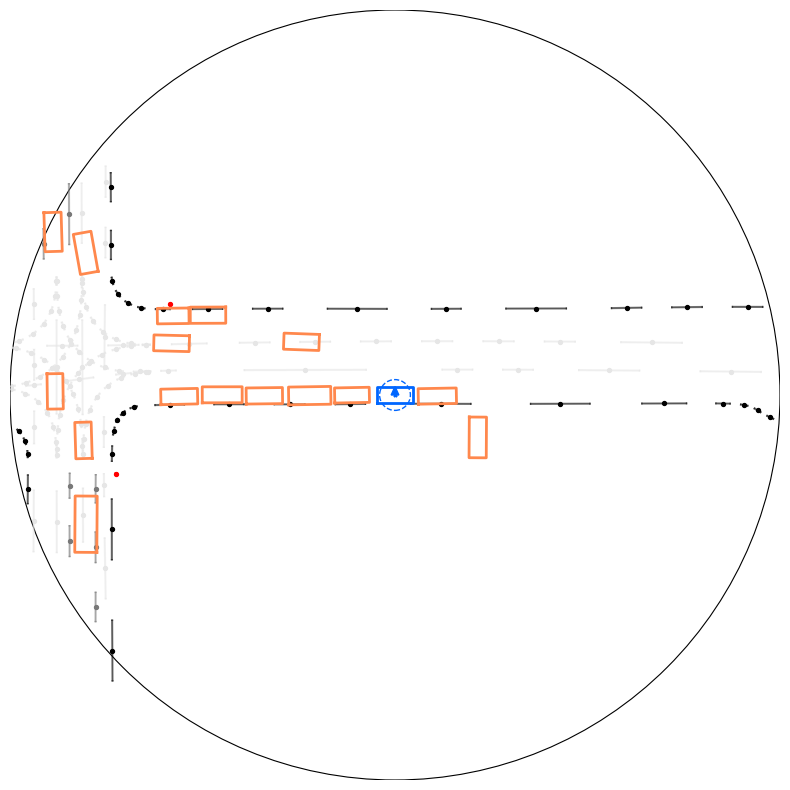

In [ ]:
env.vis.plot_agent_observation(
    env_idx=1,
    agent_idx=8,
    figsize=(10, 10),
);